In [19]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [20]:
df_ochem = pd.read_csv('/localhome/cschiebroek/ShuZe/vp/data cleaning/ochem_vp.tsv', sep='\t')
print(len(df_ochem))
#convert all temperatures to Kelvin

4999


In [21]:
#change every = x to x for Temperature
df_ochem['Temperature'] = df_ochem['Temperature'].str.replace('=', '')
#make floats
df_ochem['Temperature'] = df_ochem['Temperature'].astype(float)

In [22]:
df_ochem['Temperature_K'] = df_ochem.apply(lambda row: row['Temperature'] + 273.15 if 'C' in row[df_ochem.columns[5]] else row['Temperature'], axis=1)
df_ochem

,Unnamed: 0,SMILES,Vapor Pressure {measured},UNIT {Vapor Pressure},Temperature,UNIT {Temperature},comment (property),measurement method,comment (chemical),source,# of ortho chlorides,UNIT {# of ortho chlorides},Dataset,Quality code,UNIT {Quality code},hash_code,mdfp,Temperature_K
0,0,BrC1=C(OC2=CC=CC=C2)C=CC=C1,0.163,Pa,25.0,°C,supercooled liquid Vp,GC-RT,NaN,NaN,NaN,-,NaN,NaN,-,2f403fe24e39d29f948aa4e9feb6710b,"[14, 2, 0, 1, 0, 0, 0, 0, 1, 0, -13.9325470697...",298.15
1,1,BrC1=CC(OC2=CC=CC=C2)=CC=C1,0.128,Pa,25.0,°C,supercooled liquid Vp,GC-RT,NaN,NaN,NaN,-,NaN,NaN,-,5de10590a173bcca8091c5a2e49b3a8d,"[14, 2, 0, 1, 0, 0, 0, 0, 1, 0, -60.2223414903...",298.15
2,2,BrC1=CC=C(OC2=CC=CC=C2)C=C1,0.259,Pa,25.0,°C,subcooled liquid Vp,GC-RT,NaN,NaN,NaN,-,NaN,NaN,-,1dc397b6c45db1b753a8d3c809ae4c35,NaN,298.15
3,3,BrC1=CC=C(OC2=CC=CC=C2)C(Br)=C1,0.0168,Pa,25.0,°C,supercooled liquid Vp,GC-RT,uncertain CASRN,NaN,NaN,-,NaN,NaN,-,691f98cac2af77da13b08d10870c78aa,"[15, 2, 0, 1, 0, 0, 0, 0, 2, 0, -32.3294917860...",298.15
4,4,BrC1=CC=C(OC2=CC=CC=C2Br)C=C1,0.0137,Pa,25.0,°C,supercooled liquid Vp,GC-RT,uncertain CASRN,NaN,NaN,-,NaN,NaN,-,63cb7d7427b0eed5b7146effd265ee88,"[15, 2, 0, 1, 0, 0, 0, 0, 2, 0, -27.1301580654...",298.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4994,FC(F)(F)C(=O)C(F)(F)F,3.35,log(mmHg),NaN,-,NaN,NaN,"QsarDB repository, 2019, 10.15152:QDB",NaN,NaN,-,NaN,NaN,-,bb4b00a287653ef8b01115b6a112dec2,NaN,NaN
4995,4995,OC(=O)C(F)(F)F,2.04,log(mmHg),NaN,-,NaN,NaN,"QsarDB repository, 2019, 10.15152:QDB",NaN,NaN,-,NaN,NaN,-,9b7c414818e92c6f9c3f98f4895db75c,NaN,NaN
4996,4996,F\C(=C(\F)C(F)(F)F)C(F)(F)F,3.3,log(mmHg),NaN,-,NaN,NaN,"QsarDB repository, 2019, 10.15152:QDB",NaN,NaN,-,NaN,NaN,-,a4275c1633655b7f2607694f6bf15771,"[12, 0, 0, 0, 8, 0, 0, 0, 0, 0, 18.08974888038...",NaN
4997,4997,FC(F)(F)C(=O)C(F)(F)Cl,3.16,log(mmHg),NaN,-,NaN,NaN,"QsarDB repository, 2019, 10.15152:QDB",NaN,NaN,-,NaN,NaN,-,7eca34c4806897d349ab1d3e568d88f8,"[10, 1, 0, 1, 5, 0, 0, 1, 0, 0, 71.59181390511...",NaN


In [24]:
df_ochem[df_ochem.columns[2]] = df_ochem[df_ochem.columns[2]].str.replace('<', '')


In [25]:
#convert all values in second column to floats
df_ochem[df_ochem.columns[2]] = df_ochem[df_ochem.columns[2]].astype(float)

In [32]:
# where unit is log(Pa), convert to Pa
df_ochem['VP_pa'] = df_ochem.apply(lambda row: 10**row[df_ochem.columns[2]] if row[df_ochem.columns[3]] == 'log(Pa)' else row[df_ochem.columns[2]], axis=1)
df_ochem['VP_pa'] = df_ochem.apply(lambda row: row[df_ochem.columns[2]]*133.322 if row[df_ochem.columns[3]] == 'mmHg' else row[df_ochem.columns[2]], axis=1)
df_ochem['VP_pa'] = df_ochem.apply(lambda row: 133.322*10**row[df_ochem.columns[2]] if row[df_ochem.columns[3]] == 'log(mmHg)' else row[df_ochem.columns[2]], axis=1)
df_ochem['VP_pa'] = df_ochem.apply(lambda row: row[df_ochem.columns[2]]/1000 if row[df_ochem.columns[3]] == 'mPa' else row[df_ochem.columns[2]], axis=1)
df_ochem['VP_pa'] = df_ochem.apply(lambda row: row[df_ochem.columns[2]]*1000 if row[df_ochem.columns[3]] == 'kPa' else row[df_ochem.columns[2]], axis=1)

df_ochem

,Unnamed: 0,SMILES,Vapor Pressure {measured},UNIT {Vapor Pressure},Temperature,UNIT {Temperature},comment (property),measurement method,comment (chemical),source,# of ortho chlorides,UNIT {# of ortho chlorides},Dataset,Quality code,UNIT {Quality code},hash_code,mdfp,Temperature_K,VP_pa,standardized_smiles,NumberOfHeavyAtoms,log10VP_pa
0,0,BrC1=C(OC2=CC=CC=C2)C=CC=C1,0.1630,Pa,25.0,°C,supercooled liquid Vp,GC-RT,NaN,NaN,NaN,-,NaN,NaN,-,2f403fe24e39d29f948aa4e9feb6710b,"[14, 2, 0, 1, 0, 0, 0, 0, 1, 0, -13.9325470697...",298.15,0.1630,Brc1ccccc1Oc1ccccc1,14,-0.787812
1,1,BrC1=CC(OC2=CC=CC=C2)=CC=C1,0.1280,Pa,25.0,°C,supercooled liquid Vp,GC-RT,NaN,NaN,NaN,-,NaN,NaN,-,5de10590a173bcca8091c5a2e49b3a8d,"[14, 2, 0, 1, 0, 0, 0, 0, 1, 0, -60.2223414903...",298.15,0.1280,Brc1cccc(Oc2ccccc2)c1,14,-0.892790
2,2,BrC1=CC=C(OC2=CC=CC=C2)C=C1,0.2590,Pa,25.0,°C,subcooled liquid Vp,GC-RT,NaN,NaN,NaN,-,NaN,NaN,-,1dc397b6c45db1b753a8d3c809ae4c35,NaN,298.15,0.2590,Brc1ccc(Oc2ccccc2)cc1,14,-0.586700
3,3,BrC1=CC=C(OC2=CC=CC=C2)C(Br)=C1,0.0168,Pa,25.0,°C,supercooled liquid Vp,GC-RT,uncertain CASRN,NaN,NaN,-,NaN,NaN,-,691f98cac2af77da13b08d10870c78aa,"[15, 2, 0, 1, 0, 0, 0, 0, 2, 0, -32.3294917860...",298.15,0.0168,Brc1ccc(Oc2ccccc2)c(Br)c1,15,-1.774691
4,4,BrC1=CC=C(OC2=CC=CC=C2Br)C=C1,0.0137,Pa,25.0,°C,supercooled liquid Vp,GC-RT,uncertain CASRN,NaN,NaN,-,NaN,NaN,-,63cb7d7427b0eed5b7146effd265ee88,"[15, 2, 0, 1, 0, 0, 0, 0, 2, 0, -27.1301580654...",298.15,0.0137,Brc1ccc(Oc2ccccc2Br)cc1,15,-1.863279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4994,FC(F)(F)C(=O)C(F)(F)F,3.3500,log(mmHg),NaN,-,NaN,NaN,"QsarDB repository, 2019, 10.15152:QDB",NaN,NaN,-,NaN,NaN,-,bb4b00a287653ef8b01115b6a112dec2,NaN,NaN,3.3500,O=C(C(F)(F)F)C(F)(F)F,10,5.474902
4995,4995,OC(=O)C(F)(F)F,2.0400,log(mmHg),NaN,-,NaN,NaN,"QsarDB repository, 2019, 10.15152:QDB",NaN,NaN,-,NaN,NaN,-,9b7c414818e92c6f9c3f98f4895db75c,NaN,NaN,2.0400,O=C(O)C(F)(F)F,7,4.164902
4996,4996,F\C(=C(\F)C(F)(F)F)C(F)(F)F,3.3000,log(mmHg),NaN,-,NaN,NaN,"QsarDB repository, 2019, 10.15152:QDB",NaN,NaN,-,NaN,NaN,-,a4275c1633655b7f2607694f6bf15771,"[12, 0, 0, 0, 8, 0, 0, 0, 0, 0, 18.08974888038...",NaN,3.3000,F/C(=C(/F)C(F)(F)F)C(F)(F)F,12,5.424902
4997,4997,FC(F)(F)C(=O)C(F)(F)Cl,3.1600,log(mmHg),NaN,-,NaN,NaN,"QsarDB repository, 2019, 10.15152:QDB",NaN,NaN,-,NaN,NaN,-,7eca34c4806897d349ab1d3e568d88f8,"[10, 1, 0, 1, 5, 0, 0, 1, 0, 0, 71.59181390511...",NaN,3.1600,O=C(C(F)(F)F)C(F)(F)Cl,10,5.284902


In [33]:
#make smiles canonical and standardized
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
df_ochem['standardized_smiles'] = df_ochem.apply(lambda row: Chem.MolToSmiles(rdMolStandardize.ChargeParent(Chem.MolFromSmiles((row[df_ochem.columns[1]])))), axis=1)


[09:30:18] Initializing MetalDisconnector
[09:30:18] Running MetalDisconnector
[09:30:18] Initializing Normalizer
[09:30:18] Running Normalizer
[09:30:18] Running LargestFragmentChooser
[09:30:18] Fragment: Brc1ccccc1Oc1ccccc1
[09:30:18] New largest fragment: Brc1ccccc1Oc1ccccc1 (23)
[09:30:18] Running Uncharger
[09:30:18] Initializing MetalDisconnector
[09:30:18] Running MetalDisconnector
[09:30:18] Initializing Normalizer
[09:30:18] Running Normalizer
[09:30:18] Initializing MetalDisconnector
[09:30:18] Running MetalDisconnector
[09:30:18] Initializing Normalizer
[09:30:18] Running Normalizer
[09:30:18] Running LargestFragmentChooser
[09:30:18] Fragment: Brc1cccc(Oc2ccccc2)c1
[09:30:18] New largest fragment: Brc1cccc(Oc2ccccc2)c1 (23)
[09:30:18] Running Uncharger
[09:30:18] Initializing MetalDisconnector
[09:30:18] Running MetalDisconnector
[09:30:18] Initializing Normalizer
[09:30:18] Running Normalizer
[09:30:18] Initializing MetalDisconnector
[09:30:18] Running MetalDisconnector
[

/localhome/cschiebroek/.conda/envs/mdfp_carl/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/cschiebroek/.conda/envs/mdfp_carl/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


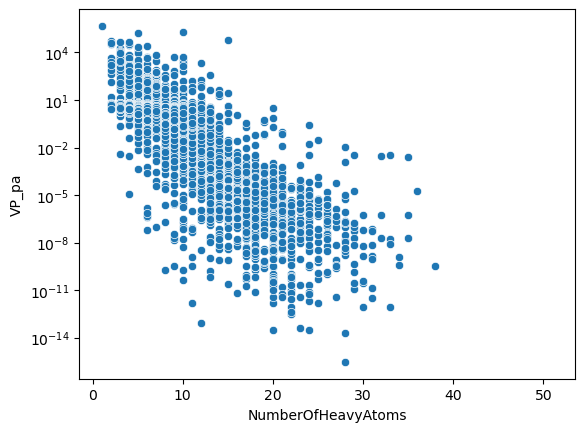

In [34]:
from rdkit import Chem
df_ochem['NumberOfHeavyAtoms'] = df_ochem.apply(lambda row: Chem.MolFromSmiles(row['standardized_smiles']).GetNumHeavyAtoms(), axis=1)
#plot NumberOfHeavyAtoms against VP_pa
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df_ochem, x='NumberOfHeavyAtoms', y='VP_pa')
#yscale('log')
plt.yscale('log')
plt.show()


In [35]:
#new column with log10(VP_pa)
import numpy as np
df_ochem['log10VP_pa'] = df_ochem.apply(lambda row: np.log10(row['VP_pa']), axis=1)

/tmp/ipykernel_384259/153501103.py:3: RuntimeWarning: invalid value encountered in log10
  df_ochem['log10VP_pa'] = df_ochem.apply(lambda row: np.log10(row['VP_pa']), axis=1)
/tmp/ipykernel_384259/153501103.py:3: RuntimeWarning: divide by zero encountered in log10
  df_ochem['log10VP_pa'] = df_ochem.apply(lambda row: np.log10(row['VP_pa']), axis=1)


In [31]:
df_ochem.to_csv('OCHEM_standardized_not_cleaned.csv', index=False)